# Домашная работа 3. Визуальный анализ.

#### Полезная литература

- [Галерея графиков Matplotlib](https://matplotlib.org/gallery/index.html)
- [Галерея графиков Seaborn](http://seaborn.pydata.org/examples/index.html)
- [Открытый курс машинного обучения. Тема 2: Визуализация данных c Python](https://habr.com/company/ods/blog/323210/)

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
colab = False # если работаете на своём компьютере, поставьте False
if colab:
    from google.colab import drive
    drive.mount('/content/drive')

## Визуальный анализ данных

В этом задании вам предлагается провести визуальный анализ датасета результатов экзаменов студентов  https://www.kaggle.com/spscientist/students-performance-in-exams. 

In [4]:
if colab:
    df = pd.read_csv('/content/drive/My Drive/Data/StudentsPerformance.csv')
else:
    df = pd.read_csv("data/StudentsPerformance.csv")

df

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75
...,...,...,...,...,...,...,...,...
995,female,group E,master's degree,standard,completed,88,99,95
996,male,group C,high school,free/reduced,none,62,55,55
997,female,group C,high school,free/reduced,completed,59,71,65
998,female,group D,some college,standard,completed,68,78,77


## Задания
#### 1. Постройте 3 графика, показывающих распределение результатов экзаменов (каждый график на предмет).


Графики должны быть в одном ряду и у них должен быть общий заголовок "Результаты экзаменов".

Для результатов каждого экзамена посчитайте медианные значения.


C:\Temp\ipykernel_17352\1394180725.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['math score'].dropna(), ax=ax1)
C:\Temp\ipykernel_17352\1394180725.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['reading score'].dropna(), ax=ax2)
C:\Temp\ipykernel_17352\1394180725.py:9: UserWarn

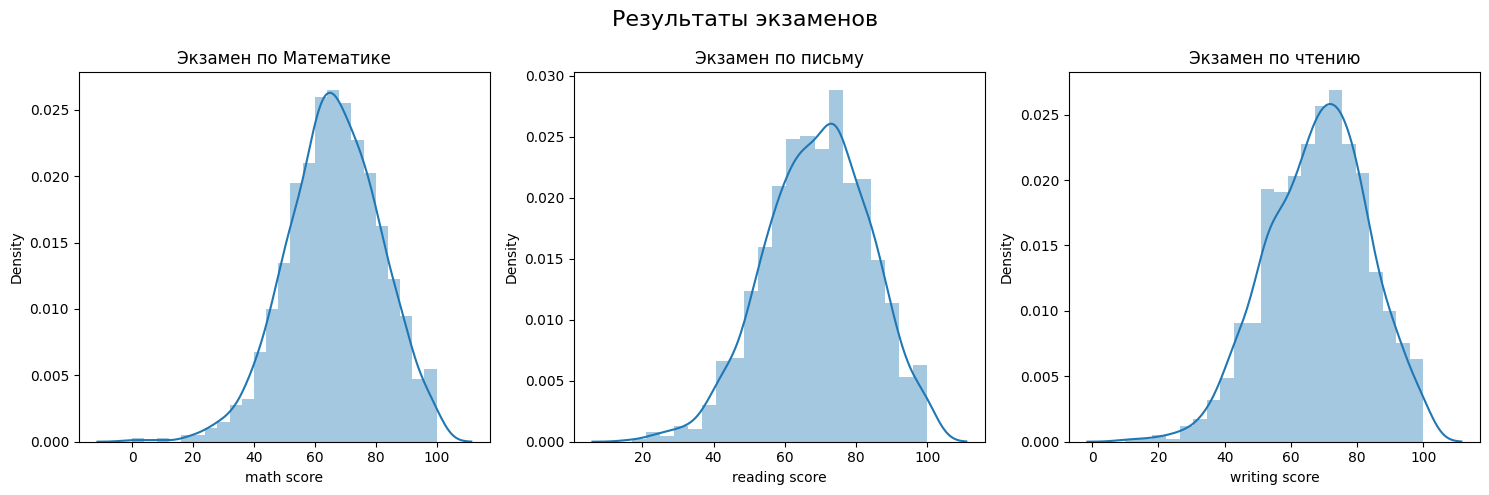

In [5]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(15, 5))

sns.distplot(df['math score'].dropna(), ax=ax1)
ax1.set_title('Экзамен по Математике')

sns.distplot(df['reading score'].dropna(), ax=ax2)
ax2.set_title('Экзамен по письму')

sns.distplot(df['writing score'].dropna(), ax=ax3)
ax3.set_title('Экзамен по чтению')

fig.suptitle('Результаты экзаменов', fontsize=16)
plt.tight_layout()

plt.show()

In [6]:
print(df['math score'].median())
print(df['writing score'].median())
print(df['reading score'].median())

66.0
69.0
70.0


#### 2. Образование родителей
Какие уровни образование есть в столбце *'parental level of education'* и сколько строк в датафрейме соответствует каждому уровню? 

Постройте график и ответьте на вопрос ниже

Отличаются ли баллы по математике у детей с разным образованием родителей?
Постройте график, где по оси Х находятся уровни образования родителей, а по У - баллы по математике.


In [7]:
print('The column has', df['parental level of education'].nunique(), 'unique values')
df['parental level of education'].value_counts()

The column has 6 unique values


parental level of education
some college          226
associate's degree    222
high school           196
some high school      179
bachelor's degree     118
master's degree        59
Name: count, dtype: int64

#### 3. Выведите число студенток, набравших больше 90 баллов по всем предметам.


In [8]:
df['full score'] = df['writing score'] + df['reading score'] + df['math score']
df[(df['writing score'] > 90) & (df['reading score'] > 90) & (df['math score'] > 90) & (df['gender'] == 'female')].shape[0]

17

#### 4. Сравните баллы у студентов разных полов. Используя agg() выведите минимальное, максимальное и медианное значение
 

In [20]:
df.groupby('gender')[['math score', 'reading score', 'writing score', 'full score']].agg(['median', 'min', 'max'])

math score          reading score          writing score           \
           median min  max        median min  max        median min  max   
gender                                                                     
female       65.0   0  100          73.0  17  100          74.0  10  100   
male         69.0  27  100          66.0  23  100          64.0  15  100   

       full score           
           median min  max  
gender                      
female      211.0  27  300  
male        199.0  69  300

#### 5. Выясните, влияет ли обед и подготовка к тесту на средний балл студентов разного пола 
###### (подсказка: используете agg())

In [23]:
df.groupby(['gender', 'test preparation course'])[['math score', 'reading score', 'writing score', 'full score']].agg(['mean'])

math score reading score writing score  \
                                     mean          mean          mean   
gender test preparation course                                          
female completed                67.195652     77.375000     78.793478   
       none                     61.670659     69.982036     68.982036   
male   completed                72.339080     70.212644     69.793103   
       none                     66.688312     62.795455     59.649351   

                                full score  
                                      mean  
gender test preparation course              
female completed                223.364130  
       none                     200.634731  
male   completed                212.344828  
       none                     189.133117

#### 6. Постройте график, показывающий зависимость уровня образования родителей от их расы 

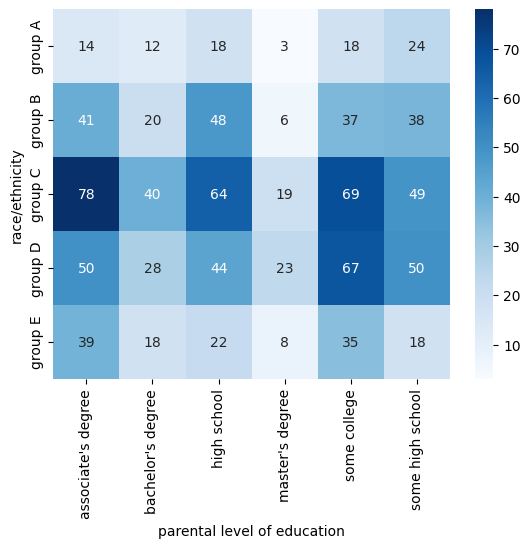

In [26]:
cross_tab = pd.crosstab(df['race/ethnicity'], df['parental level of education'])

sns.heatmap(cross_tab, annot=True, cmap='Blues')
plt.show()

#### 7. Постройте график, показывающий зависимость прохождения подготовительного теста от уровня образования родителей.


Кто чаще ходит на курсы: дети, родители которых закончили только старшую школу, или дети, чьи родители получили степень бакалавра\магистра?

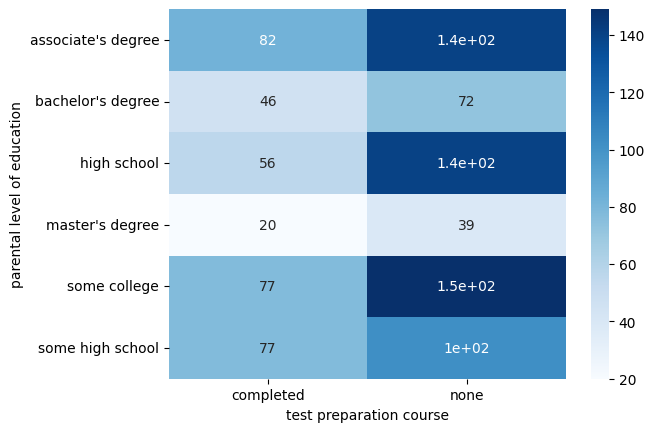

In [28]:
cross_tab = pd.crosstab(df['parental level of education'], df['test preparation course'])

sns.heatmap(cross_tab, annot=True, cmap='Blues')
plt.show()

#### 8. Постройте plot.pie, показывающий, сколько людей сдали\не сдали экзамен по математике.

Сдавшим считается человек, набравший 40 баллов.

###### Подсказка: создайте столбец в датафрейме, который содержит результат сдачи (сдал или не сдал)

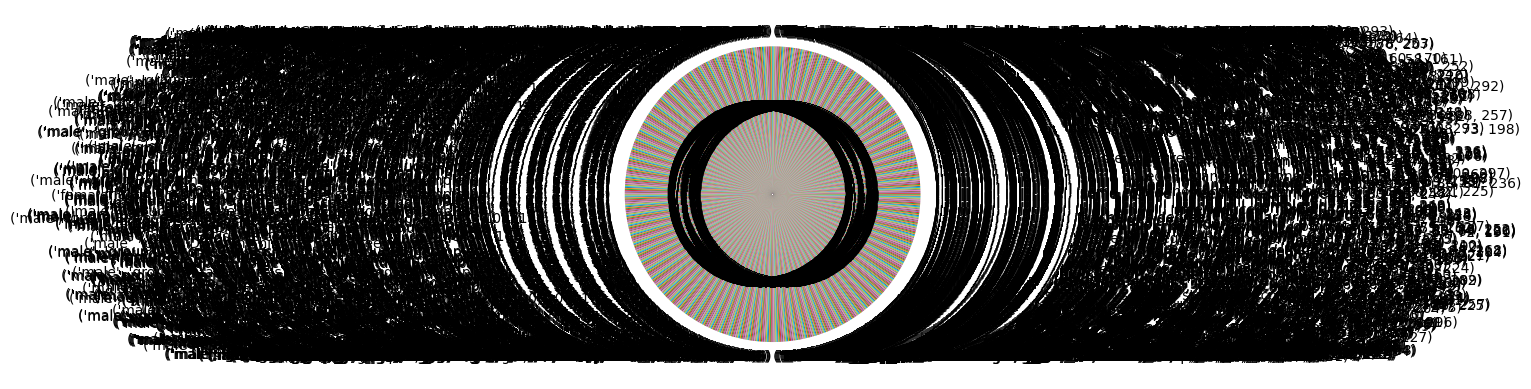

In [31]:
counts = df[df['math score'] > 40].value_counts()

plt.pie(counts, labels=counts.index, autopct='%1.1f%%', startangle=90)
plt.title = "Распределение сдавших"
plt.show()

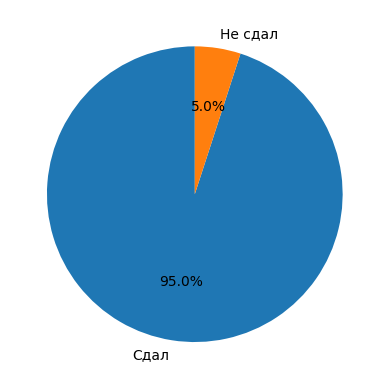

In [37]:
df['passed math'] = df['math score'] > 40

counts = df['passed math'].value_counts().reindex([True, False], fill_value=0)
counts.index = ["Сдал", "Не сдал"]

plt.pie(counts, labels=counts.index, autopct='%1.1f%%', startangle=90)
plt.show()

#### 9. Постройте plot.pie, показывающий распределение студентов по оценкам

Оценки студентов выставляются по шкале:<br>
0  - 40 marks : grade E<br>
41 - 60 marks : grade D<br>
60 - 70 marks : grade C<br>
70 - 80 marks : grade B<br>
80 - 90 marks : grade A<br>
90 - 100 marks : grade O<br>

Для этого посчитайте сумму результатов за 3 экзамена и найдите среднее. Оценка выставляется по среднему значению. Если студент не сдал математику(даже если средний балл выше 40), он получает Е

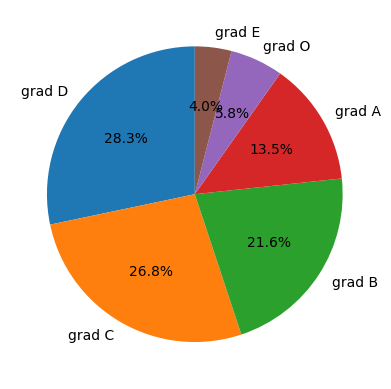

In [36]:
labels = ['grad E', 'grad D', 'grad C', 'grad B', 'grad A', 'grad O']
bins = [0, 39, 59, 69, 79, 89, 100]
df['math grade'] = pd.cut(df['math score'], bins=bins, labels=labels, include_lowest=True)

counts = df['math grade'].value_counts()

plt.pie(counts, labels=counts.index, autopct='%1.1f%%', startangle=90)
plt.show()

#### 10. Постройте countplot, показывающий зависимость между итоговой оценкой студентов и его полом. Студенты какого пола получили больше оценок О, А, В

<Axes: xlabel='math grade', ylabel='count'>

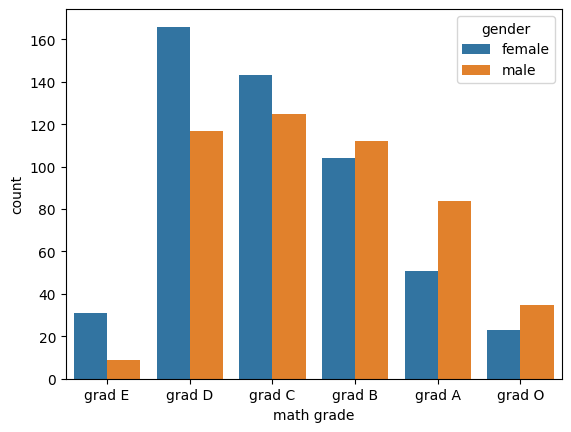

In [38]:
sns.countplot(x='math grade', data=df, hue='gender')